# Introduction

In this lab, we will build a pipeline for dimensionality reduction and classification using Principal Component Analysis (PCA) and Logistic Regression. We will use the scikit-learn library to perform unsupervised dimensionality reduction on the digits dataset using PCA. We will then use a logistic regression model for classification. We will use GridSearchCV to set the dimensionality of the PCA and find the best combination of PCA truncation and classifier regularization.

# Import Required Libraries

We will first import the required libraries for the implementation of the pipeline.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl


from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define Pipeline Components

We will define the pipeline components including the PCA, Standard Scaler and Logistic Regression. We will set the tolerance to a large value to make the example faster.

In [2]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()

# Define a StandardScaler()
scaler = StandardScaler()

logistic = LogisticRegression(max_iter=10_000, tol=0.1)

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('logistic', logistic)])

# Load Dataset and Define Parameters for GridSearchCV

We will load the digits dataset and define parameters for GridSearchCV. We will set the parameter for PCA truncation and classifier regularization.

In [3]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

param_grid = {
    'pca__n_components': [5, 15, 30, 45, 60],
    'logistic__C' : np.logspace(-4, 4, 4),
}

# Perform GridSearchCV

We will perform GridSearchCV to find the best combination of PCA truncation and classifier regularization.

In [4]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_digits, y_digits)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.1))]),
             n_jobs=2,
             param_grid={'logistic__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'pca__n_components': [5, 15, 30, 45, 60]})

# Print Best Parameters and Score

We will print the best parameters and score obtained from the GridSearchCV.

In [5]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.874):
{'logistic__C': np.float64(21.54434690031882), 'pca__n_components': 60}


# Plot PCA Spectrum

We will plot the PCA spectrum to visualize the explained variance ratio of each principal component.

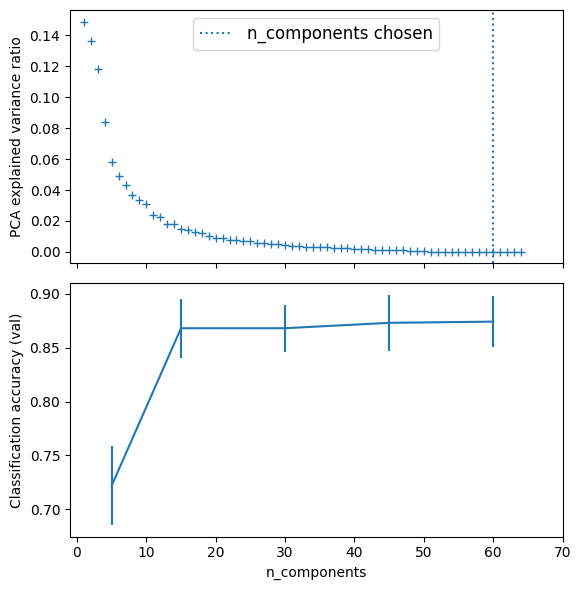

In [11]:
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
components_col = "param_pca__n_components"
is_max_test_score = pl.col("mean_test_score") == pl.col("mean_test_score").max()
best_clfs = (
    pl.LazyFrame(search.cv_results_)
    .filter(is_max_test_score.over(components_col))
    .unique(components_col)
    .sort(components_col)
    .collect()
)
ax1.errorbar(
    best_clfs[components_col],
    best_clfs["mean_test_score"],
    yerr=best_clfs["std_test_score"],
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

For each number of components, we will find the best classifier results.

# Summary

In this lab, we have learned how to build a pipeline for dimensionality reduction and classification using Principal Component Analysis (PCA) and Logistic Regression. We have used the scikit-learn library to perform unsupervised dimensionality reduction on the digits dataset using PCA. We have then used a logistic regression model for classification. We have used GridSearchCV to set the dimensionality of the PCA and find the best combination of PCA truncation and classifier regularization. We have plotted the PCA spectrum and classification accuracy for each number of components.